In [113]:
import numpy as np
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
data=pd.read_csv("player-value-prediction.csv")
data.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,value
0,210824,F. Tchenkoua,Fabien Tchenkoua,10/1/1992,26,172.72,73.9,"LM,RM",Cameroon,64,...,51+2,51+2,51+2,57+2,56+2,50+2,50+2,50+2,56+2,525000.0
1,172835,M. Andreolli,Marco Andreolli,6/10/1986,32,187.96,79.8,CB,Italy,72,...,61+2,61+2,61+2,54+2,58+2,71+2,71+2,71+2,58+2,1800000.0
2,212223,S. Maguire,Sean Maguire,5/1/1994,24,175.26,68.0,"ST,LM",Republic of Ireland,71,...,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2,3400000.0
3,188168,G. Friend,George Friend,10/19/1987,31,187.96,83.0,"LB,LWB",England,72,...,68+2,68+2,68+2,70+2,70+2,70+2,70+2,70+2,70+2,2200000.0
4,226139,J. Tamimi,Jonathan Tamimi,10/12/1994,24,175.26,74.8,"RWB,RM",Jordan,64,...,58+2,58+2,58+2,62+2,61+2,58+2,58+2,58+2,61+2,525000.0


In [38]:
data.columns

Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'wage', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type',
       'release_clause_euro', 'club_team', 'club_rating', 'club_position',
       'club_jersey_number', 'club_join_date', 'contract_end_year',
       'national_team', 'national_rating', 'national_team_position',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_hand

In [40]:
new_player_position = data['positions'].str.get_dummies(sep=',').add_prefix('position')
new_player_position.head()

,positionCAM,positionCB,positionCDM,positionCF,positionCM,positionGK,positionLB,positionLM,positionLW,positionLWB,positionRB,positionRM,positionRW,positionRWB,positionST
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [41]:
data =  pd.concat([data,new_player_position],axis = 1)
data.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,positionGK,positionLB,positionLM,positionLW,positionLWB,positionRB,positionRM,positionRW,positionRWB,positionST
0,210824,F. Tchenkoua,Fabien Tchenkoua,10/1/1992,26,172.72,73.9,"LM,RM",Cameroon,64,...,0,0,1,0,0,0,1,0,0,0
1,172835,M. Andreolli,Marco Andreolli,6/10/1986,32,187.96,79.8,CB,Italy,72,...,0,0,0,0,0,0,0,0,0,0
2,212223,S. Maguire,Sean Maguire,5/1/1994,24,175.26,68.0,"ST,LM",Republic of Ireland,71,...,0,0,1,0,0,0,0,0,0,1
3,188168,G. Friend,George Friend,10/19/1987,31,187.96,83.0,"LB,LWB",England,72,...,0,1,0,0,1,0,0,0,0,0
4,226139,J. Tamimi,Jonathan Tamimi,10/12/1994,24,175.26,74.8,"RWB,RM",Jordan,64,...,0,0,0,0,0,0,1,0,1,0


In [42]:
data=data.drop(['positions','full_name','birth_date'],axis=1)

In [43]:
data.head()

,id,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,wage,preferred_foot,...,positionGK,positionLB,positionLM,positionLW,positionLWB,positionRB,positionRM,positionRW,positionRWB,positionST
0,210824,F. Tchenkoua,26,172.72,73.9,Cameroon,64,65,1000.0,Right,...,0,0,1,0,0,0,1,0,0,0
1,172835,M. Andreolli,32,187.96,79.8,Italy,72,72,11000.0,Right,...,0,0,0,0,0,0,0,0,0,0
2,212223,S. Maguire,24,175.26,68.0,Republic of Ireland,71,78,10000.0,Right,...,0,0,1,0,0,0,0,0,0,1
3,188168,G. Friend,31,187.96,83.0,England,72,72,33000.0,Left,...,0,1,0,0,1,0,0,0,0,0
4,226139,J. Tamimi,24,175.26,74.8,Jordan,64,71,1000.0,Right,...,0,0,0,0,0,0,1,0,1,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14363 entries, 0 to 14362
Columns: 104 entries, id to positionST
dtypes: float64(9), int64(56), object(39)
memory usage: 9.3+ MB


In [133]:
data['name'].isnull().sum()

0

In [45]:
columns = [ 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB']
       

In [46]:
data[columns]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,62+2,62+2,62+2,65+2,64+2,64+2,64+2,65+2,63+2,63+2,...,57+2,51+2,51+2,51+2,57+2,56+2,50+2,50+2,50+2,56+2
1,46+2,46+2,46+2,42+2,44+2,44+2,44+2,42+2,44+2,44+2,...,54+2,61+2,61+2,61+2,54+2,58+2,71+2,71+2,71+2,58+2
2,69+2,69+2,69+2,69+2,70+2,70+2,70+2,69+2,67+2,67+2,...,53+2,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2
3,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,63+2,63+2,...,70+2,68+2,68+2,68+2,70+2,70+2,70+2,70+2,70+2,70+2
4,53+2,53+2,53+2,57+2,55+2,55+2,55+2,57+2,55+2,55+2,...,62+2,58+2,58+2,58+2,62+2,61+2,58+2,58+2,58+2,61+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14358,63+2,63+2,63+2,61+2,62+2,62+2,62+2,61+2,63+2,63+2,...,57+2,61+2,61+2,61+2,57+2,57+2,61+2,61+2,61+2,57+2
14359,54+2,54+2,54+2,58+2,57+2,57+2,57+2,58+2,59+2,59+2,...,54+2,53+2,53+2,53+2,54+2,53+2,48+2,48+2,48+2,53+2
14360,57+3,57+3,57+3,58+3,58+3,58+3,58+3,58+3,60+3,60+3,...,71+3,75+3,75+3,75+3,71+3,73+3,79+3,79+3,79+3,73+3
14361,39+2,39+2,39+2,39+2,38+2,38+2,38+2,39+2,37+2,37+2,...,53+2,51+2,51+2,51+2,53+2,55+2,58+2,58+2,58+2,55+2


In [47]:
for col in columns:
    data[col]=data[col].str.split('+',n=1,expand=True)[0]

In [48]:
data[columns].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,62,62,62,65,64,64,64,65,63,63,...,57,51,51,51,57,56,50,50,50,56
1,46,46,46,42,44,44,44,42,44,44,...,54,61,61,61,54,58,71,71,71,58
2,69,69,69,69,70,70,70,69,67,67,...,53,48,48,48,53,51,47,47,47,51
3,63,63,63,64,64,64,64,64,63,63,...,70,68,68,68,70,70,70,70,70,70
4,53,53,53,57,55,55,55,57,55,55,...,62,58,58,58,62,61,58,58,58,61


In [64]:
data[columns]=data[columns].fillna(0)

In [65]:
data[columns]=data[columns].astype(int)

In [66]:
data[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14363 entries, 0 to 14362
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LS      14363 non-null  int32
 1   ST      14363 non-null  int32
 2   RS      14363 non-null  int32
 3   LW      14363 non-null  int32
 4   LF      14363 non-null  int32
 5   CF      14363 non-null  int32
 6   RF      14363 non-null  int32
 7   RW      14363 non-null  int32
 8   LAM     14363 non-null  int32
 9   CAM     14363 non-null  int32
 10  RAM     14363 non-null  int32
 11  LM      14363 non-null  int32
 12  LCM     14363 non-null  int32
 13  CM      14363 non-null  int32
 14  RCM     14363 non-null  int32
 15  RM      14363 non-null  int32
 16  LWB     14363 non-null  int32
 17  LDM     14363 non-null  int32
 18  CDM     14363 non-null  int32
 19  RDM     14363 non-null  int32
 20  RWB     14363 non-null  int32
 21  LB      14363 non-null  int32
 22  LCB     14363 non-null  int32
 23  CB      143

In [67]:
data['shot_power']=data['shot_power'].fillna(data['shot_power'].median())
data['dribbling']=data['dribbling'].fillna(data['dribbling'].median())

In [69]:
data['wage']=data['wage'].fillna(data['wage'].mean())

In [72]:
data['value'].head()

0     525000.0
1    1800000.0
2    3400000.0
3    2200000.0
4     525000.0
Name: value, dtype: float64

In [71]:
data['wage']=data['wage'].fillna(data['wage'].mean())

198

In [79]:
for col in data.columns:
    val=data[col].isnull().sum()/data[col].count()*100
    #print('column name:'+col+ "="+str(val))
    if(val>=25):
        print(col+ "="+str(val))
        data=data.drop(col,axis=1)
    

        

national_team=1987.6453488372092
national_rating=1987.6453488372092
national_team_position=1987.6453488372092
national_jersey_number=1987.6453488372092
tags=1181.2667261373774
traits=120.83333333333333


In [81]:
data['preferred_foot'].isnull().sum()

0

In [82]:
counts_preferred_foot = data["preferred_foot"].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["preferred_foot","Count"]
print(counts_preferred_foot)

  preferred_foot  Count
0          Right  11011
1           Left   3352


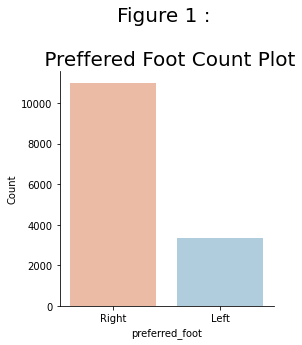

In [83]:
pt = sns.catplot(y="Count",
            x="preferred_foot", data=counts_preferred_foot,
           palette="RdBu",height=4, aspect=1, kind="bar");
plt.title("Figure 1 : \n\n Preffered Foot Count Plot",
          fontsize=20);

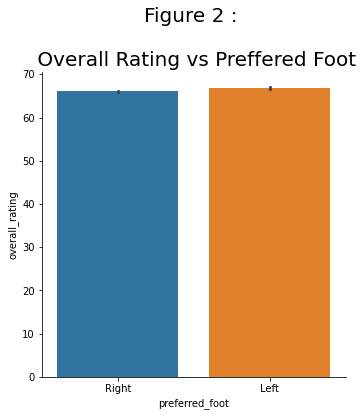

In [85]:
sns.catplot(x="preferred_foot", y="overall_rating", data=data,
            aspect=1, kind="bar");
plt.title("Figure 2 : \n\n Overall Rating vs Preffered Foot",
          fontsize=20);

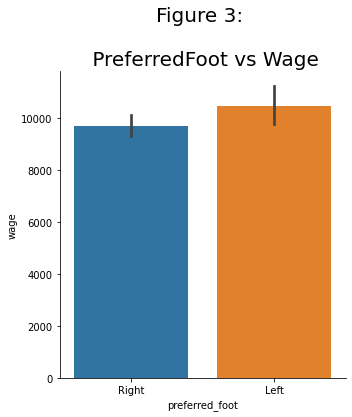

In [86]:
sns.catplot(x="preferred_foot", y="wage", data=data, aspect=1, kind="bar");
plt.title("Figure 3: \n\n PreferredFoot vs Wage",
          fontsize=20);

From figure, it seems that Left preffered foot get more rating. But, again i will tell that, It requires some more statistical test analysis.

In [132]:
data['nationality'].isnull().sum()

0

In [87]:
counts_Nationality = data["nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality.head()

,Nations,Counts
0,England,1300
1,Germany,954
2,Spain,862
3,France,748
4,Argentina,694


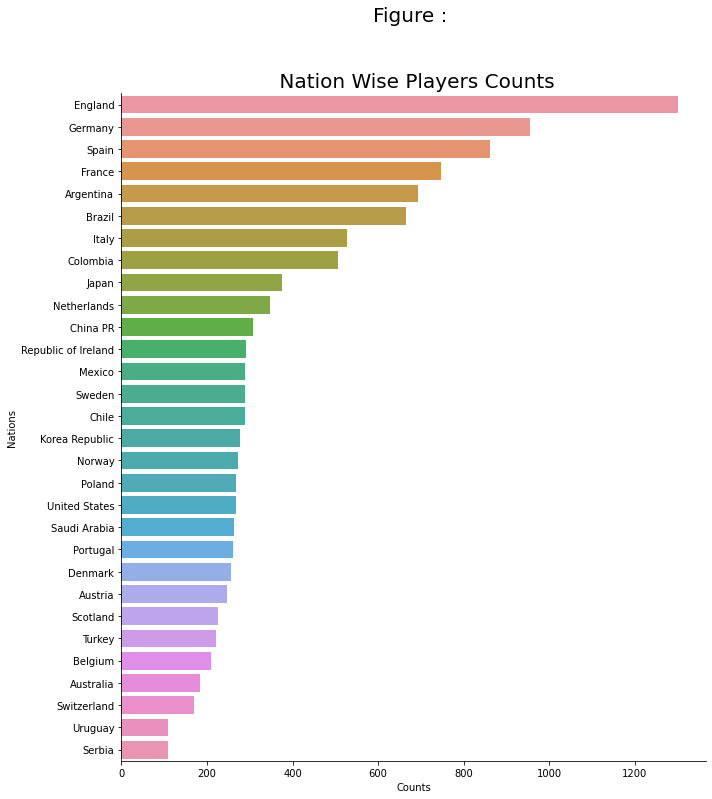

In [90]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality.head(30),
            height=10,kind="bar")
plt.title("Figure : \n\n\n Nation Wise Players Counts",
          fontsize=20);

In [93]:
counts_Nationality_top20 = counts_Nationality.iloc[0:20,:]
print(counts_Nationality_top20)

                Nations  Counts
0               England    1300
1               Germany     954
2                 Spain     862
3                France     748
4             Argentina     694
5                Brazil     664
6                 Italy     527
7              Colombia     506
8                 Japan     376
9           Netherlands     347
10             China PR     307
11  Republic of Ireland     291
12               Mexico     289
13               Sweden     289
14                Chile     288
15       Korea Republic     278
16               Norway     273
17               Poland     269
18        United States     269
19         Saudi Arabia     264


In [95]:
avgwageoverall = data.groupby("nationality", as_index=False)["wage","overall_rating"].mean()
avgwageoverall.sort_values(by="wage",inplace=True,ascending=False)
avgwageoverall.head()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,nationality,wage,overall_rating
40,Dominican Republic,71000.000000,72.000000
7,Armenia,28000.000000,69.714286
54,Gabon,27666.666667,70.400000
25,Central African Rep.,26000.000000,76.000000
42,Egypt,24511.829818,71.086957


In [96]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,nationality,wage,overall_rating
40,Dominican Republic,71000.000000,72.000000
7,Armenia,28000.000000,69.714286
54,Gabon,27666.666667,70.400000
25,Central African Rep.,26000.000000,76.000000
42,Egypt,24511.829818,71.086957
33,Croatia,21950.495050,69.990099
45,Equatorial Guinea,21000.000000,70.250000
139,Tanzania,19000.000000,77.000000
13,Belgium,18664.537662,68.985646
2,Algeria,18588.235294,70.921569


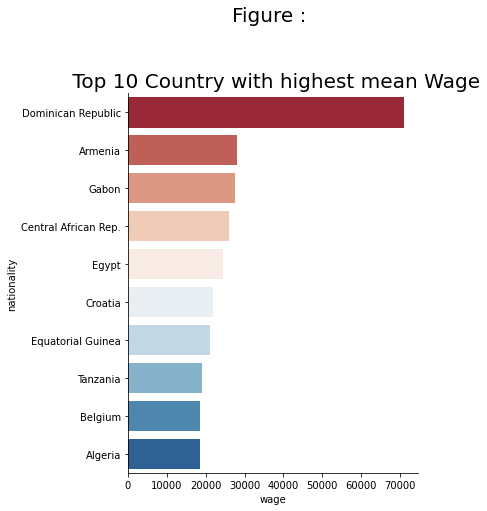

In [99]:
sns.catplot(y="nationality",
            x="wage",data=top10bywage,
            palette="RdBu",height=6,kind="bar",aspect=1)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage",
          fontsize=20);

In [101]:
avgwageoverall.sort_values(by="overall_rating",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,nationality,wage,overall_rating
139,Tanzania,19000.000000,77.000000
25,Central African Rep.,26000.000000,76.000000
75,Israel,15769.230769,72.076923
40,Dominican Republic,71000.000000,72.000000
109,Oman,12000.000000,72.000000
101,Mozambique,10500.000000,71.500000
117,Portugal,13365.986151,71.152672
18,Brazil,17787.650602,71.102410
42,Egypt,24511.829818,71.086957
89,Libya,5000.000000,71.000000


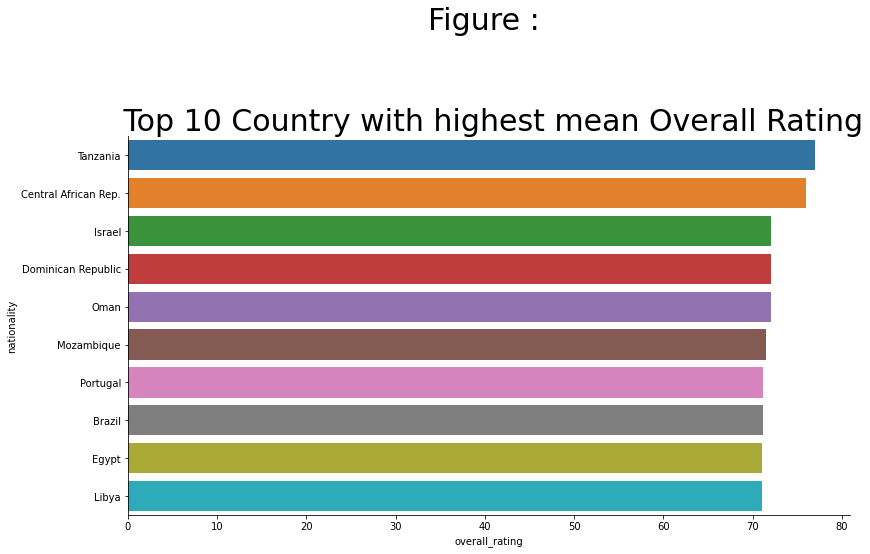

In [103]:
sns.catplot(y="nationality",
            x="overall_rating",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating",
          fontsize=30);

Nationality affect wage and overall rating of Player.

In [131]:
data['age'].isnull().sum()

0

In [115]:
data['age'].unique()

array([26, 32, 24, 31, 21, 23, 27, 30, 20, 18, 22, 25, 29, 28, 36, 34, 19,
       35, 17, 40, 33, 37, 38, 39, 41, 45, 44], dtype=int64)

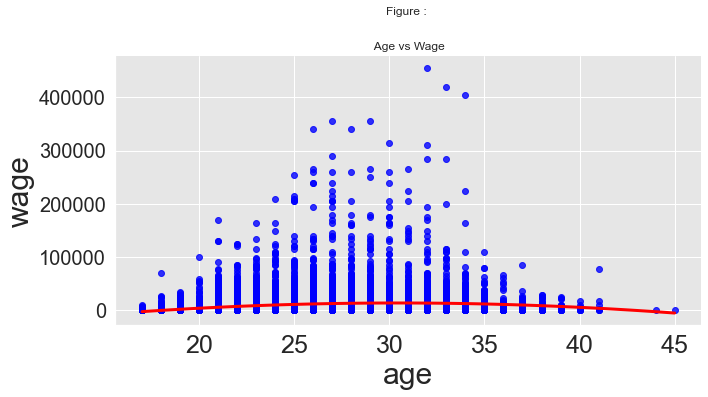

In [153]:
sns.lmplot(x="age", y="wage",data=data,
           order=2, ci=None, scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Age vs Wage");

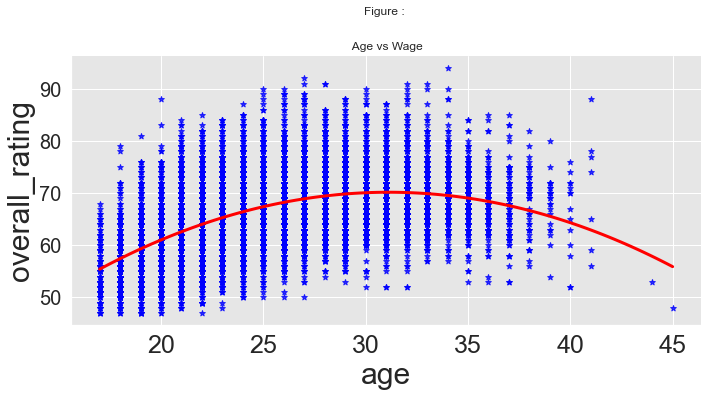

In [151]:
sns.lmplot(x="age", y="overall_rating",data=data,markers="*",
           order=2, ci=None, scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Age vs overall_rating");


Age of a Player does not affect much on their Wage.
As Age increase the Overall rating increases.

In [124]:
data['age'].describe()

count    14363.000000
mean        25.575367
std          4.700271
min         17.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         45.000000
Name: age, dtype: float64

In [129]:
data.loc[data['overall_rating'] == data['overall_rating'].max()][['name', 'age', 'overall_rating','international_reputation(1-5)']]

,name,age,overall_rating,international_reputation(1-5)
9489,Cristiano Ronaldo,34,94,5


In [128]:
data.loc[data['overall_rating'] == data['overall_rating'].min()][['name', 'age', 'overall_rating']]

,name,age,overall_rating,international_reputation(1-5)
278,A. Kaltner,19,47,1
1276,O. Antman,17,47,1
2182,Gao Yuqin,18,47,1
3430,N. Fuentes,19,47,1
5333,J. Ruíz,22,47,1
6106,S. Griffin,19,47,1
6238,L. Jones,20,47,1
6248,L. Watkins,19,47,1
6914,L. Collins,17,47,1
7212,C. Ehlich,20,47,1


In [135]:
data['club_team'].isnull().sum()

12

In [136]:
data['club_team']=data['club_team'].fillna('NA')

In [137]:
avgwageoverall = data.groupby("club_team", as_index=False)["wage","overall_rating"].mean()
avgwageoverall.sort_values(by="wage",inplace=True,ascending=False)
avgwageoverall.head()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,club_team,wage,overall_rating
496,Real Madrid,147392.857143,78.285714
225,FC Barcelona,145833.333333,78.208333
345,Juventus,130578.947368,81.842105
394,Manchester United,104814.814815,77.518519
393,Manchester City,99960.000000,74.560000


In [138]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,club_team,wage,overall_rating
496,Real Madrid,147392.857143,78.285714
225,FC Barcelona,145833.333333,78.208333
345,Juventus,130578.947368,81.842105
394,Manchester United,104814.814815,77.518519
393,Manchester City,99960.000000,74.560000
141,Chelsea,90423.076923,74.769231
382,Liverpool,85720.000000,74.880000
616,Tottenham Hotspur,83400.000000,76.720000
52,Arsenal,79074.074074,75.222222
419,Napoli,76722.222222,80.222222


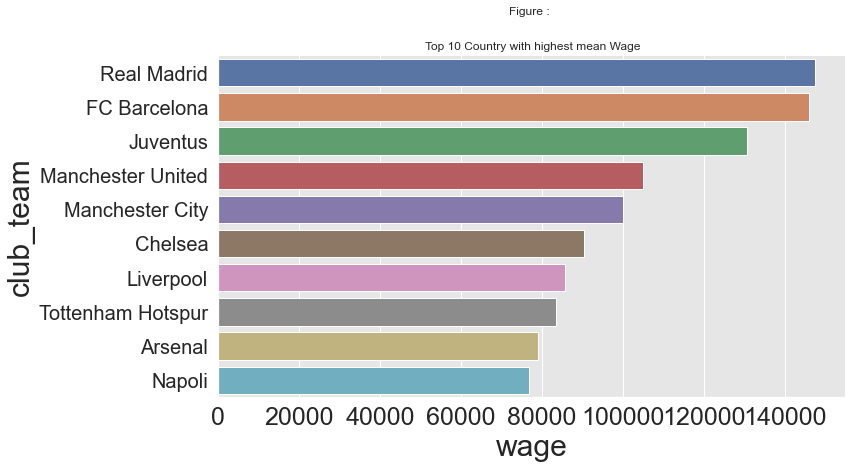

In [140]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(y="club_team",
            x="wage",data=top10bywage,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage");

In [142]:
avgwageoverall.sort_values(by="overall_rating",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,club_team,wage,overall_rating
77,Belgium,14944.185718,82.500000
477,Portugal,18314.728573,82.000000
337,Italy,61000.000000,82.000000
345,Juventus,130578.947368,81.842105
419,Napoli,76722.222222,80.222222
333,Inter,62450.000000,79.100000
458,Paris Saint-Germain,76583.333333,78.416667
496,Real Madrid,147392.857143,78.285714
225,FC Barcelona,145833.333333,78.208333
370,Lazio,47611.111111,78.166667


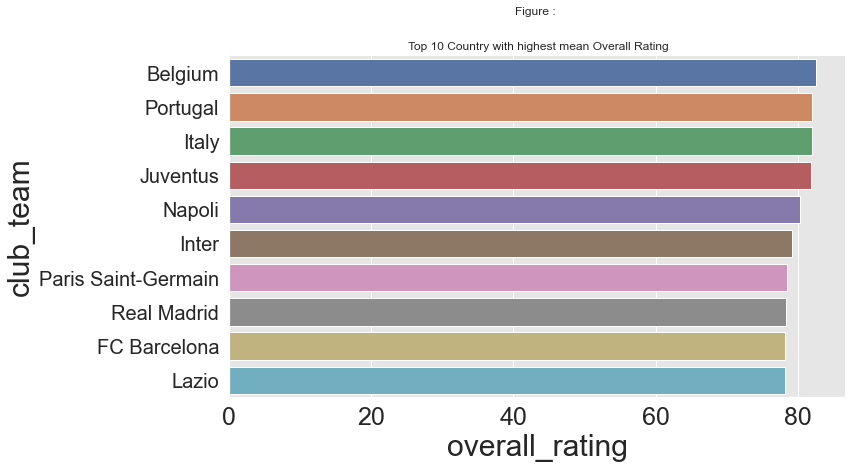

In [144]:
sns.catplot(y="club_team",
            x="overall_rating",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating");

 Club is having very distinct affect on wage. 
 Club is not having very sharp impact on overall rating.

In [159]:
data['height_cm'].isna().sum()

0

In [154]:
dataHeight = data.loc[:,["height_cm","wage","overall_rating"]].sort_values("height_cm")
dataHeight.head()

,height_cm,wage,overall_rating
6470,152.4,1000.0,56
10036,152.4,10000.0,72
12433,152.4,3000.0,66
1652,152.4,22000.0,84
5392,152.4,11000.0,71


In [156]:
avgwageoverall = data.groupby("height_cm", as_index=False)["wage","overall_rating"].mean()
avgwageoverall.sort_values(by="wage",inplace=True,ascending=False)
avgwageoverall.head()


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,height_cm,wage,overall_rating
4,162.56,15500.000000,68.115385
16,198.12,12243.517026,66.369863
14,193.04,11347.582613,66.773026
12,187.96,10883.233324,66.971751
8,172.72,10717.330137,66.403248


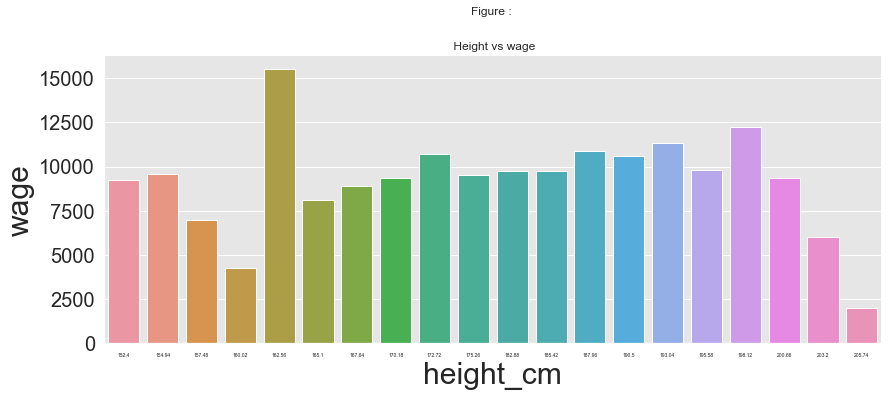

In [158]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':5,
            'ytick.labelsize':20})
sns.catplot(x="height_cm", y="wage",data=avgwageoverall,
            kind="bar",aspect=2.5);
plt.title("Figure : \n\n\n Height vs wage");

Height is having effect on wage but not in regular fashion.

In [167]:
dataHeight = data.loc[:,["weight_kgs","wage","overall_rating"]].sort_values("weight_kgs")
dataHeight.head()

,weight_kgs,wage,overall_rating
4285,49.9,1000.0,55
11954,49.9,3000.0,63
2589,52.2,6000.0,71
8910,53.1,1000.0,54
9541,53.1,1000.0,56


In [168]:
avgwageoverall = data.groupby("weight_kgs", as_index=False)["wage","overall_rating"].mean()
avgwageoverall.sort_values(by="wage",inplace=True,ascending=False)
avgwageoverall.head()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,weight_kgs,wage,overall_rating
49,99.8,77000.000000,82.000000
45,96.2,32461.538462,69.384615
46,97.1,30500.000000,72.400000
41,92.1,22181.818182,69.848485
43,93.9,20535.714286,69.785714


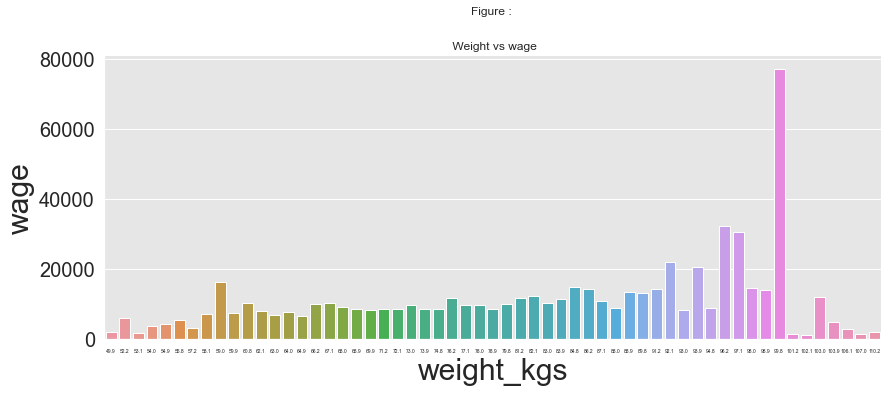

In [169]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':5,
            'ytick.labelsize':20})
sns.catplot(x="weight_kgs", y="wage",data=avgwageoverall,
            kind="bar",aspect=2.5);
plt.title("Figure : \n\n\n Weight vs wage");

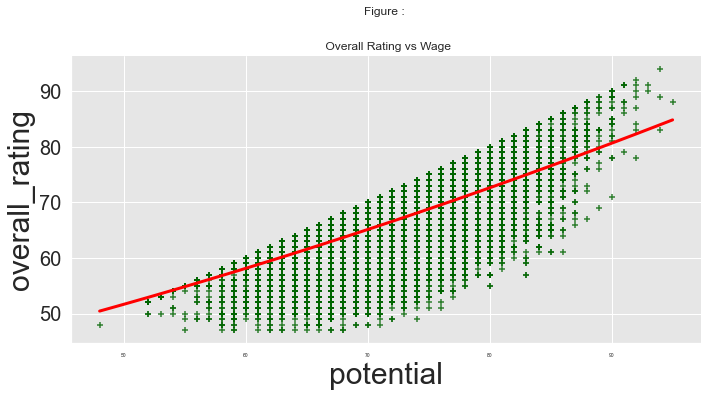

In [170]:
sns.lmplot(x="potential", y="overall_rating",data=data,markers="+",
           order=2, ci=None, scatter_kws={"color": "darkgreen"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Overall Rating vs Wage");

Overall rating is directly proportional to Potential. (As Potential increases the overall rating also increases).
As potential is estimated, in simalar way rating to the players is done.

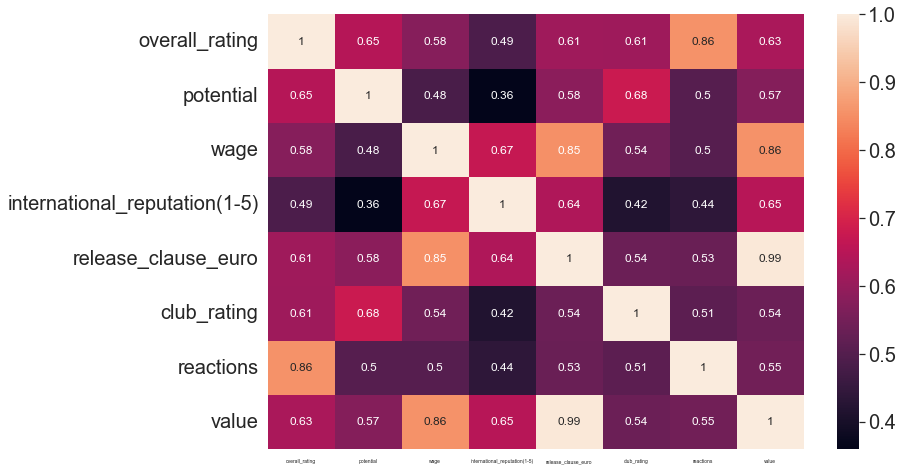

In [171]:
corr = data.corr()
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['value'])>0.5]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [176]:
UNuseful_Columns=['reactions','release_clause_euro']
data=data.drop(UNuseful_Columns,axis=1)

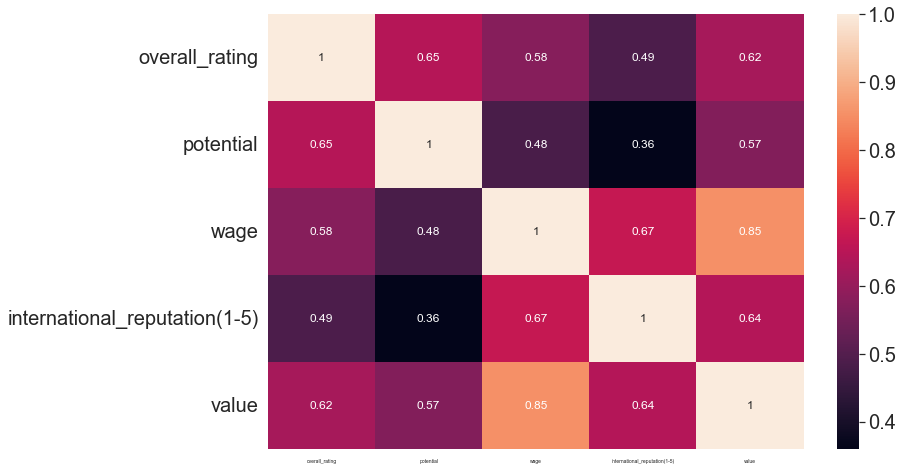

In [177]:
corr = data.corr()
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['value'])>0.5]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()